In [19]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import xgboost as xgb

# Load the dataset (replace with your actual file path)
#df = pd.read_csv('data/2024-06-01_2024-09-01/aggregated/percent_return.csv')
#df = pd.read_csv('data/2024-08-20_2024-08-28/aggregated/percent_return.csv')
#df = pd.read_csv('data/2023-09-01_2024-09-01/aggregated/percent_return.csv') # 1 year's worth of data
df = pd.read_csv('data/2020-09-01_2024-09-01/aggregated/percent_return.csv')
clustered_df = pd.read_csv('data/Cluster_data/3Clusters(2020-09-01_2024-09-01).csv')

# Extract stock names
stock_names = clustered_df.columns[1:]  # Assuming the first column is the date

# Get companies in Cluster 1, dropping any NaN values
cluster_1_companies = clustered_df['Cluster 1'].dropna().tolist()

# Filter the dataset to include only Cluster 1 companies
df_cluster_1 = df[['date'] + [col for col in df.columns if col in cluster_1_companies]]
df_cluster_1.head(11)
#df_cluster_1.to_csv("data\cluster_1")

#Print the filtered DataFrame
#print(df) #every 5th row is a friday

,date,ACGL,ADBE,ADSK,AKAM,ALB,ALGN,AMD,AMZN,ANET,...,ULTA,URI,VRSN,VRTX,WAT,WBD,WDC,WST,WYNN,ZBRA
0,2020-09-01,-3.906643,2.514565,2.225892,1.474847,2.569774,2.803765,0.282857,0.273379,-0.017843,...,1.019393,1.336917,0.190372,-0.856517,-2.005914,-2.813071,-1.865963,-2.249769,-2.757455,-0.048724
1,2020-09-02,-3.741745,-0.456879,2.297640,-0.008364,-1.433579,5.430258,-4.031487,-0.438405,1.836012,...,1.733660,-1.163528,1.244238,2.267450,1.796099,2.394367,3.104277,0.541926,1.625396,1.798306
2,2020-09-03,-5.527812,-3.467415,-5.731865,-3.702446,-9.558146,-3.060571,-6.033693,-3.357249,-3.489716,...,0.025211,-6.880163,-5.588878,-5.123101,-4.133025,-1.502048,-2.204363,-6.887913,-3.858747,-7.525073
3,2020-09-04,-7.352068,-2.518576,-2.764725,-3.669152,-2.322332,-2.830189,0.687545,-0.704636,-2.525743,...,0.493040,-2.975563,-1.875331,-0.500297,-1.716979,4.250459,1.247018,-1.741227,-2.511497,-3.087230
4,2020-09-08,-6.419512,-2.068281,0.089221,-1.875587,-3.910344,3.076773,0.819986,0.185755,0.631407,...,-0.392876,-1.849896,-1.145210,-1.210946,0.650082,-0.310145,-1.566292,-0.133259,-4.590680,-2.078181
5,2020-09-09,-3.935801,1.171106,2.271428,2.570383,-2.966682,4.466735,0.626538,2.048705,0.517272,...,0.718806,-1.723914,0.552129,0.739161,0.155404,2.397864,-0.354419,1.088567,-2.688728,-1.986322
6,2020-09-10,-6.234187,-3.031657,-2.478634,-2.583370,-6.172173,1.200400,-4.923554,-3.994593,-2.901686,...,-2.996614,-5.011438,-1.093962,-2.776200,-1.743316,0.947057,-1.494563,0.054895,-2.789059,-2.180391
7,2020-09-11,-6.342594,-3.229445,-0.306774,-0.318266,-3.730358,-3.432135,-4.359814,-2.881855,-1.901231,...,-1.940624,-1.623540,0.065659,0.046539,-0.541358,-2.477573,2.383559,-2.712455,-4.766956,-1.037293
8,2020-09-14,-4.971370,0.189697,-0.519412,0.240899,-1.752962,1.242606,1.432290,-2.205213,-0.633339,...,1.359307,-2.783661,0.707946,1.362731,-0.354350,3.347828,2.473681,0.100219,-0.945620,-0.856252
9,2020-09-15,-7.356973,0.795970,1.896492,0.000000,-4.645939,2.541828,1.635329,0.636769,0.624085,...,0.512476,-3.029588,0.348692,0.029995,-0.440637,-0.125789,-3.351244,0.752235,-3.762307,1.290424


In [20]:
df.shape

(1006, 492)

In [21]:
# Identify companies in Cluster 1 not found in df
missing_companies = [company for company in cluster_1_companies if company not in df.columns]
print(f"Companies in Cluster 1 not found in df: {missing_companies}")
print(f"Number of companies in Cluster 1: {len(cluster_1_companies)}")
print(f"Number of matched companies: {len(cluster_1_companies) - len(missing_companies)}")


Companies in Cluster 1 not found in df: []
Number of companies in Cluster 1: 125
Number of matched companies: 125


In [22]:
# Prepare the data for Monday to Thursday (features) and Friday (target)
X = []
y = []

# Iterate over the dataset in chunks of 5 rows (representing one week)
for i in range(0, len(df_cluster_1), 5):
    if i + 4 >= len(df_cluster_1):  # Prevent going out of bounds
        break
    # Monday to Thursday data (features)
    X.extend(df_cluster_1.iloc[i:i+4, 1:].T.values.tolist()) # rows are companies
    #X += df.iloc[i:i+4, 1:].T.values
    # Friday data (target)
    y.extend(df_cluster_1.iloc[i+4, 1:].T.values.tolist())  # Friday returns as target

# Convert to numpy arrays
X = np.array(X)
y = np.array(y)

# Train-test split (e.g., 80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import TimeSeriesSplit
import xgboost as xgb
import numpy as np

# Define the parameter distributions
param_dist = {
    'learning_rate': [0.01, 0.02, 0.03, 0.04, 0.05, 0.1, 0.2],
    'gamma': [0, 2, 4, 6, 8, 10],
    'max_depth': [3, 4, 5, 6, 7],
    'min_child_weight': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'max_delta_step': [0, 2, 4, 6, 8, 10],
    'n_estimators': [100, 150, 200, 250, 300],
    'subsample': [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    'alpha': [0, 1, 2, 5, 10],  # L1 regularization
    'lambda': [1, 2, 4, 6, 8, 10],  # Adjusted L2 regularization
}

# Initialize the XGBoost model
xgb_model = xgb.XGBRegressor(objective='reg:squarederror')

# Set up RandomizedSearchCV
random_search = RandomizedSearchCV(
    estimator=xgb_model,
    param_distributions=param_dist,
    n_iter=100,  # Number of parameter settings to sample
    scoring='r2',  # Optimize for R^2 score
    cv=TimeSeriesSplit(n_splits=5),  # 5-fold cross-validation, with time series(stock data)
    random_state=42,  # For reproducibility
    n_jobs=-1  # Use all available cores
)

# Fit the random search
random_search.fit(X_train, y_train)

# Output best parameters and best score
print("Best Parameters:", random_search.best_params_)
print("Best R^2 Score:", random_search.best_score_)

# Retrieve the best model
best_model = random_search.best_estimator_

best_model.fit(X_train, y_train)

# Evaluate the model on the test set
predictions = best_model.predict(X_test)

Best Parameters: {'subsample': 0.6, 'n_estimators': 150, 'min_child_weight': 10, 'max_depth': 5, 'max_delta_step': 10, 'learning_rate': 0.02, 'lambda': 8, 'gamma': 8, 'alpha': 5}
Best R^2 Score: 0.06482453638021005


In [24]:
from sklearn.dummy import DummyRegressor

# Baseline model that predicts the mean y for all feature values
baseline_model = DummyRegressor(strategy="mean")
baseline_model.fit(X_train, y_train)
baseline_predictions = baseline_model.predict(X_test)

In [25]:
# Calculate R^2 scores
from sklearn.model_selection import cross_val_score, TimeSeriesSplit
from sklearn.metrics import r2_score

tscv = TimeSeriesSplit(n_splits=5)
cv_scores = cross_val_score(best_model, X_train, y_train, cv=tscv, scoring='r2')
print("Cross-Validation Scores (Training Data):", cv_scores)
print("Mean CV R^2 Score:", np.mean(cv_scores))

# Evaluate on test set
test_r2 = r2_score(y_test, best_model.predict(X_test))
print("Test R^2 Score:", test_r2)

baseline_r2 = r2_score(y_test, baseline_predictions) # should be 0, since it predicts the mean
print(f"Baseline R^2 Score: {baseline_r2}")


Cross-Validation Scores (Training Data): [0.0491239  0.06801508 0.04680487 0.06219461 0.09798422]
Mean CV R^2 Score: 0.06482453638021005
Test R^2 Score: 0.07071032442375047
Baseline R^2 Score: -6.959460287037089e-05


In [26]:
### Model evaluation
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Model RMSE: {rmse}")

# Calculate RMSE for baseline
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))
print("Baseline RMSE:", baseline_rmse)
print("Model Improvement:", baseline_rmse - rmse)

Model RMSE: 2.06099859571431
Baseline RMSE: 2.1380470177484048
Model Improvement: 0.07704842203409479


In [27]:
from sklearn.metrics import mean_squared_error

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Model RMSE: {rmse:.2f}")

# Calculate Baseline RMSE
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))
print(f"Baseline RMSE: {baseline_rmse:.2f}")
print(f"Model Improvement: {baseline_rmse - rmse:.2f}")

# Daily change standard deviation
daily_changes = np.diff(predictions).std()
print(f"Daily Change Std Dev: {daily_changes}")

# Residuals (errors for each prediction)
residuals = y_test - predictions
print(f"Residuals Std. Dev:{np.std(residuals)}")

Model RMSE: 2.06
Baseline RMSE: 2.14
Model Improvement: 0.08
Daily Change Std Dev: 0.7466356158256531
Residuals Std. Dev:2.060888891272567


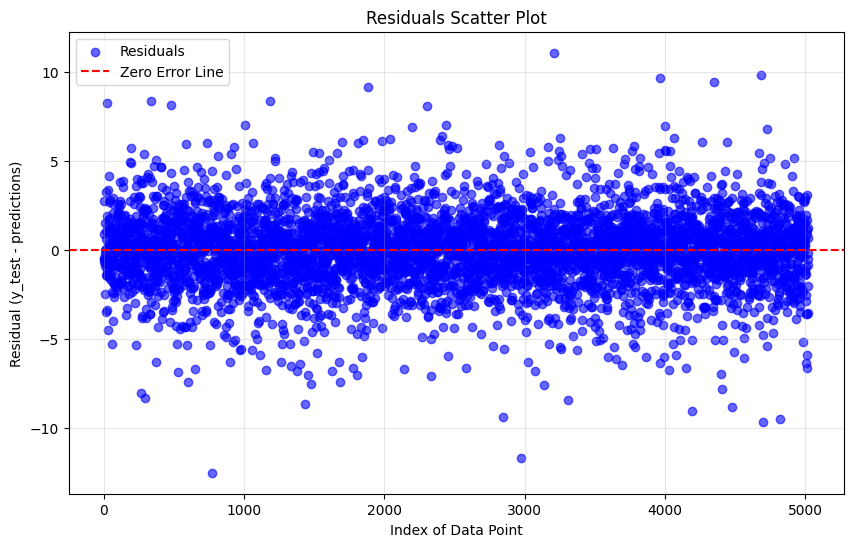

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Scatter plot of residuals
plt.figure(figsize=(10, 6))
plt.scatter(range(len(residuals)), residuals, alpha=0.6, color='blue', label='Residuals')
plt.axhline(y=0, color='red', linestyle='--', label='Zero Error Line')

# Labels and title
plt.xlabel('Index of Data Point')
plt.ylabel('Residual (y_test - predictions)')
plt.title('Residuals Scatter Plot')
plt.legend()
plt.grid(alpha=0.3)

plt.show()


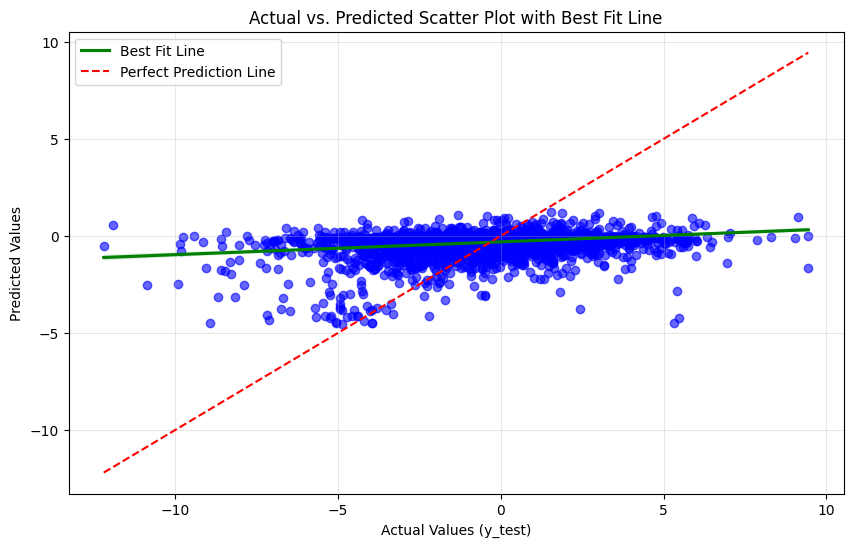

In [29]:
import seaborn as sns

# Scatter plot with regression line
plt.figure(figsize=(10, 6))
sns.regplot(x=y_test, y=predictions, scatter_kws={'alpha': 0.6, 'label': 'Predicted vs. Actual'}, color='blue', line_kws={'color': 'green', 'label': 'Best Fit Line'})

# Add perfect prediction line
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--', label='Perfect Prediction Line')

# Labels and title
plt.xlabel('Actual Values (y_test)')
plt.ylabel('Predicted Values')
plt.title('Actual vs. Predicted Scatter Plot with Best Fit Line')
plt.legend()
plt.grid(alpha=0.3)

plt.show()

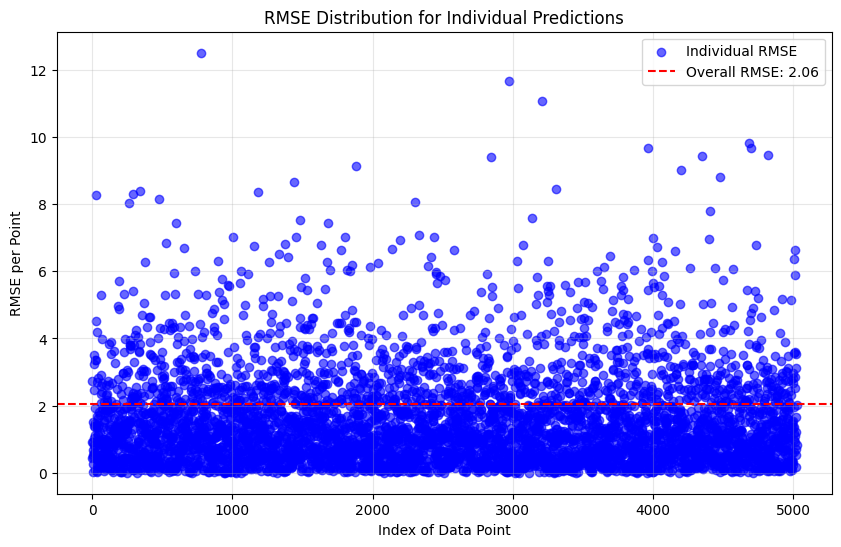

In [30]:
# Calculate individual RMSE values (absolute errors)
individual_rmse = np.sqrt((y_test - predictions) ** 2)

# Scatter plot of individual RMSE values
plt.figure(figsize=(10, 6))
plt.scatter(range(len(individual_rmse)), individual_rmse, alpha=0.6, color='blue', label='Individual RMSE')
plt.axhline(y=rmse, color='red', linestyle='--', label=f'Overall RMSE: {rmse:.2f}')

# Labels and title
plt.xlabel('Index of Data Point')
plt.ylabel('RMSE per Point')
plt.title('RMSE Distribution for Individual Predictions')
plt.legend()
plt.grid(alpha=0.3)

plt.show()
